In [156]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import tqdm

## Let's consider only electron spin and see what's the effect of off-axis magnetic field

First:
1. There is no misalignment
2. In Rotating Frame with Rotating wave approximation

In [8]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))*0.5
Sx = sigmax()/2
Sy = sigmay()/2

Om_R = 2*np.pi*10  # MHz
Delta = 2*np.pi*10  # MHz

H = Delta*Sz+ Om_R *Sx # Hamiltonian
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 4*np.pi/Om_R, 5000) # in us: list of times for which the solver should store the state vector
result = mesolve(H, psi0, tlist, [], [])

<IPython.core.display.Javascript object>


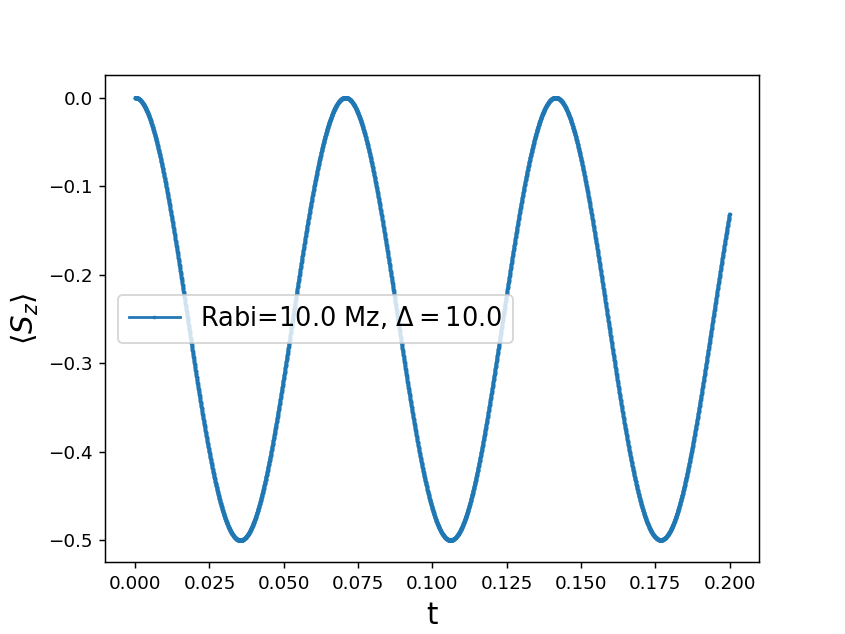

In [9]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R/(2*np.pi))+' $\Delta={}$'.format(Delta/(2*np.pi)))
plt.xlabel("t", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

# Now we do NOT go to RF and we are in LAB frame

In [18]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))/2
Sx = sigmax()
Sy = sigmay()


Om_R = 2*np.pi*10  # MHz
Delta = 2*np.pi*10  # MHz

B = 100 # Gaus
gamma_e = 2.8 #MHz/G
om_z = 2*np.pi*gamma_e*B          # MHz

def H1_coeff(t, args):
    return np.cos(om_z*t) # Hamiltonian
H = [(om_z+Delta)*Sz, [Om_R*Sx ,H1_coeff]]
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 20*np.pi/Om_R, 5000) # in us: list of times for which the solver should store the state vector
c_ops = [1/0.5 * Sz] # T2*
result = mesolve(H, psi0, tlist, c_ops, [])

<IPython.core.display.Javascript object>


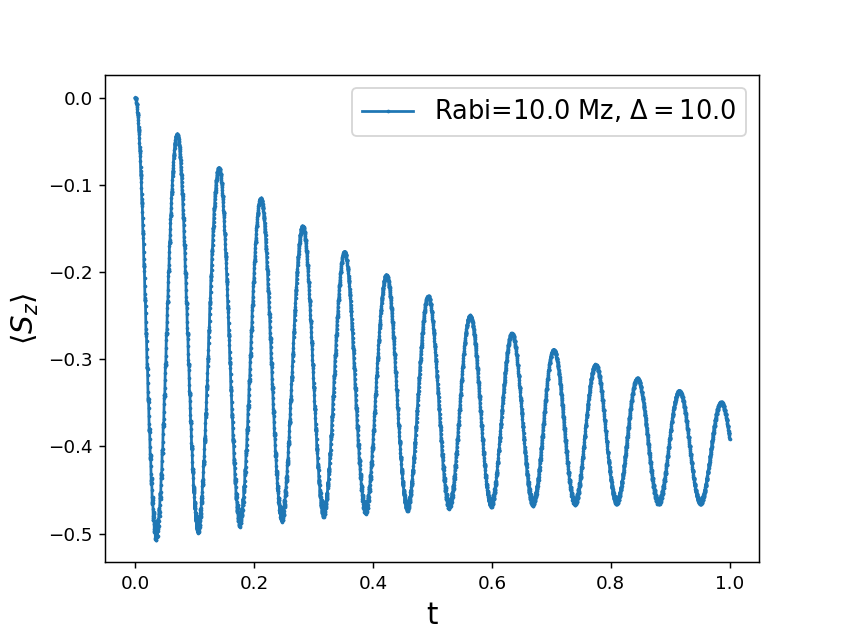

In [19]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R/(2*np.pi))+' $\Delta={}$'.format(Delta/(2*np.pi)))
plt.xlabel("t", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

## Let's add zero field splitting

In [22]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))/2
Sx = sigmax()
Sy = sigmay()


Om_R = 2*np.pi*10  # MHz
Delta = 2*np.pi*10  # MHz
D = 2*np.pi*2.87e3 # MHz

tet = 0 *np.pi/180 # off-axis angle
phi = 0 *np.pi/180 # off-axis angle phi
B = 100 # Gaus
gamma_e = 2.8 #MHz/G
om_z = 2*np.pi*gamma_e*B*np.cos(tet)             # MHz
om_x = 2*np.pi*gamma_e*B*np.sin(tet)*np.cos(phi) # MHz
om_y = 2*np.pi*gamma_e*B*np.sin(tet)*np.sin(phi) # MHz
om_MW = D - om_z - Delta

def H1_coeff(t, args):
    return np.cos(om_MW*t) # Hamiltonian
H = [D*Sz*Sz+om_z*Sz, [Om_R*Sx ,H1_coeff]]
psi0 = basis(2,0) # initial state
tlist = np.linspace(0, 4*np.pi/Om_R, 5000) # in us: list of times for which the solver should store the state vector
result = mesolve(H, psi0, tlist, [], [])

<IPython.core.display.Javascript object>


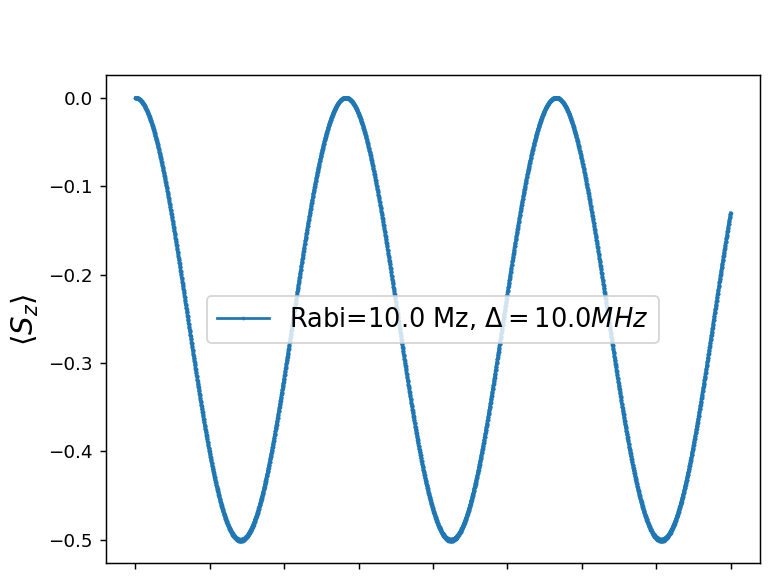

In [23]:
%matplotlib notebook
plt.figure(dpi = 120)
plt.plot(tlist, expect(Sz, result.states),'-o',markersize=1,
         label='Rabi={} Mz,'.format(Om_R/(2*np.pi))+' $\Delta={} MHz$'.format(Delta/(2*np.pi)))
plt.xlabel("t (us)", fontsize=16)
plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
plt.legend(fontsize=14)

## Let's consider misalignment of magnetic field

<IPython.core.display.Javascript object>


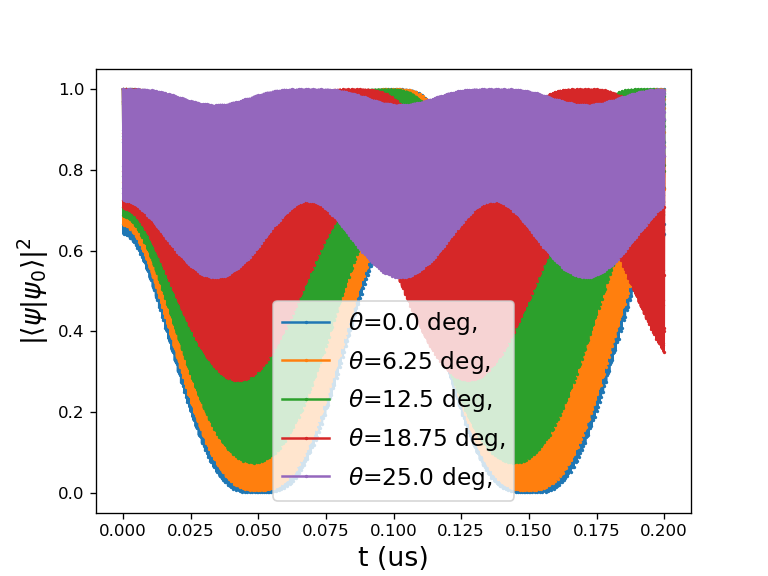

In [196]:
#NV in (0, -1) subspace
Sz = (sigmaz()-qeye(2))/2
Sx = sigmax()
Sy = sigmay()

%matplotlib notebook
plt.figure(dpi = 120)

Om_R = 2*np.pi*10  # MHz
Delta = 2*np.pi*0  # MHz
D = 2*np.pi*2.87e3 # MHz
om_MW = -D + om_z - Delta

Tet = np.linspace(0, 25, 5) *np.pi/180 # off-axis angle
phi = 0 *np.pi/180 # off-axis angle phi
for tet in Tet:
    B = 100 # Gaus
    gamma_e = 2.8 #MHz/G
    om_z = 2*np.pi*gamma_e*B*np.cos(tet)             # MHz
    om_x = 2*np.pi*gamma_e*B*np.sin(tet)*np.cos(phi) # MHz
    om_y = 2*np.pi*gamma_e*B*np.sin(tet)*np.sin(phi) # MHz
    om_MW = D - om_z - Delta

    def H1_coeff(t, args):
        return np.cos(om_MW*t) # Hamiltonian
    H = [D*Sz*Sz+om_z*Sz+om_x*Sx+om_y*Sy, [Om_R*Sx ,H1_coeff]]
    psi0 = Qobj([[1],[3]]) # initial state
    psi0 = psi0/psi0.norm()
    tlist = np.linspace(0, 4*np.pi/Om_R, 5000) # in us: list of times for which the solver should store the state vector
    result = mesolve(H, psi0, tlist, [], [])
    exp_sz = expect(Sz, result.states)
    prob_initial_state = []
    for state in result.states:
        prob_initial_state.append(state.overlap(psi0) * psi0.overlap(state))

    plt.plot(tlist,prob_initial_state ,'-o',markersize=1,
             label=r'$\theta$={} deg,'.format(1e-3*(round(1e3*tet*180/np.pi))))
    plt.xlabel("t (us)", fontsize=16)
    #plt.ylabel(r'$\left<S_z\right>$', fontsize=16)
    plt.ylabel(r'${|\left<\psi | \psi_0 \right>|}^2$', fontsize=16)
    plt.legend(fontsize=14)

In [184]:
a=0.5*basis(2,0)+basis(2,1)
Qobj([[2],[0]]).norm()

2.0

# eigenenergies when field is misaligned

<IPython.core.display.Javascript object>


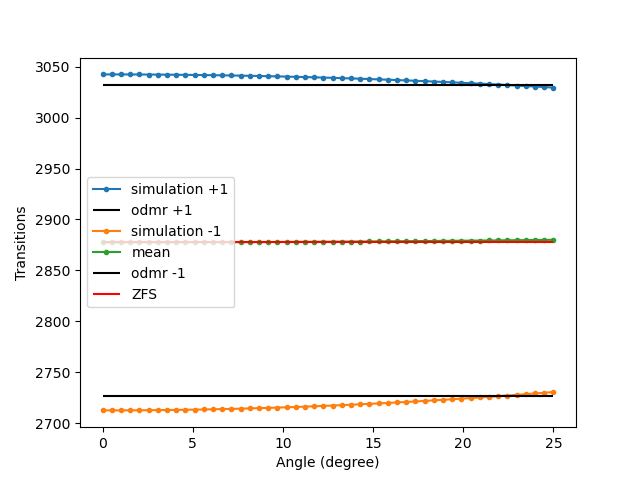

<IPython.core.display.Javascript object>


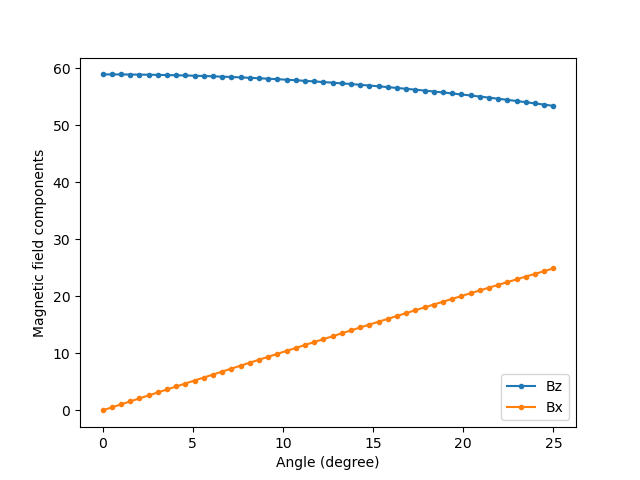

In [148]:
from numpy import sqrt
Sx, Sy, Sz = jmat(1)
D = 2*np.pi*2877.5 # MHz
B = 63/1.07 # Gaus
gamma_e = 2.8 #MHz/G
phi = 0
Tett = np.linspace(0, 25, 50) # off-axis angle in degree
Tet = Tett *np.pi/180 # off-axis angle in radian
Bx,Bz = [], []
T1,T2 = [], []
for tet in Tet:
    om_z = 2*np.pi*gamma_e*B*np.cos(tet)             # MHz
    om_x = 2*np.pi*gamma_e*B*np.sin(tet)*np.cos(phi) # MHz
    om_y = 2*np.pi*gamma_e*B*np.sin(tet)*np.sin(phi) # MHz
    Bx.append(om_x/2/np.pi/gamma_e)
    Bz.append(om_z/2/np.pi/gamma_e)
    
    H = D*Sz*Sz + om_z*Sz + om_x*Sx
    #H = Qobj([[D+om_z,om_x/sqrt(2),0],[om_x/sqrt(2),0,om_x/sqrt(2)],[0,om_x/sqrt(2),D-om_z]])
    e = H.eigenenergies()/(2*np.pi)
    T1.append(e[1]-e[0])
    T2.append(e[2]-e[0])
plt.figure()
plt.plot(Tett, T2, 'o-', ms=3, label='simulation +1')
plt.hlines(y=3031.986,xmin=min(Tett),xmax=max(Tett),color='black', label='odmr +1')
plt.xlabel('Angle (degree)')
plt.ylabel('Transitions')
plt.legend()

#plt.figure()
plt.plot(Tett, T1, 'o-', ms=3, label='simulation -1')
plt.plot(Tett, (np.array(T1)+np.array(T2))/2, 'o-', ms=3, label='mean')
plt.hlines(y=2727.22,xmin=min(Tett),xmax=max(Tett),color='black', label='odmr -1')
plt.hlines(y=D/np.pi/2,xmin=min(Tett),xmax=max(Tett),color='red', label='ZFS')
plt.xlabel('Angle (degree)')
plt.ylabel('Transitions')
plt.legend(loc=6)

plt.figure()
plt.plot(Tett, Bz, 'o-',ms=3, label='Bz')
plt.plot(Tett, Bx, 'o-',ms=3, label='Bx')
plt.xlabel('Angle (degree)')
plt.ylabel('Magnetic field components')
plt.legend()

# Nuclear spins

In [ ]:
from numpy import sqrt

B = 58 # Gaus
gamma_n = 1.07 #MHz/G
phi = 0
Tett = np.linspace(0, 25, 50) # off-axis angle in degree
Tet = Tett *np.pi/180 # off-axis angle in radian
Bx,Bz = [], []
T = []
for tet in Tet:
    om_z = 2*np.pi*gamma_n*B*np.cos(tet)             # MHz
    om_x = 2*np.pi*gamma_n*B*np.sin(tet)*np.cos(phi) # MHz
    om_y = 2*np.pi*gamma_n*B*np.sin(tet)*np.sin(phi) # MHz
    Bx.append(om_x/2/np.pi/gamma_n)
    Bz.append(om_z/2/np.pi/gamma_n)
    
    H = Qobj([[om_z/2, om_x/2],[om_x/2,-om_z/2]])
    e = H.eigenenergies()/(2*np.pi)
    T.append(e[1]-e[0])
plt.figure()
plt.plot(Tett, T2, 'o-', ms=3, label='simulation +1')
#plt.hlines(y=3031.986,xmin=min(Tett),xmax=max(Tett),color='black', label='odmr +1')
plt.xlabel('Angle (degree)')
plt.ylabel('Transitions')
plt.legend()

#plt.figure()
plt.plot(Tett, T1, 'o-', ms=3, label='simulation -1')
#plt.hlines(y=2727.22,xmin=min(Tett),xmax=max(Tett),color='black', label='odmr -1')
plt.xlabel('Angle (degree)')
plt.ylabel('Transitions')
plt.legend()

plt.figure()
plt.plot(Tett, Bz, 'o-',ms=3, label='Bz')
plt.plot(Tett, Bx, 'o-',ms=3, label='Bx')
plt.xlabel('Angle (degree)')
plt.ylabel('Magnetic field components')
plt.legend()

In [109]:
B = 63/1.07 # Gaus
gamma_n = 1.07 #MHz/G
tet=10*np.pi/180
phi=0
om_z = 2*np.pi*gamma_n*B*np.cos(tet)             # MHz
om_x = 2*np.pi*gamma_n*B*np.sin(tet)*np.cos(phi) # MHz
om_y = 2*np.pi*gamma_n*B*np.sin(tet)*np.sin(phi) # MHz

H = Qobj([[om_z/2, om_x/2],[om_x/2,-om_z/2]])
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 194.91348253   34.36850587]
 [  34.36850587 -194.91348253]]

In [111]:
e = H.eigenenergies()
e

array([-197.92033718,  197.92033718])